In [1]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

In [2]:
list=['https://www.gutenberg.org/cache/epub/66637/pg66637-images.html',
     'https://www.gutenberg.org/cache/epub/66631/pg66631-images.html',
     'https://www.gutenberg.org/cache/epub/40108/pg40108-images.html',
     'https://www.gutenberg.org/cache/epub/6145/pg6145.html',
     'https://www.gutenberg.org/cache/epub/56577/pg56577-images.html',
     'https://www.gutenberg.org/cache/epub/66639/pg66639-images.html',
     'https://www.gutenberg.org/cache/epub/66635/pg66635-images.html',
     'https://www.gutenberg.org/cache/epub/16537/pg16537-images.html',
     'https://www.gutenberg.org/cache/epub/1661/pg1661-images.html',
     'https://www.gutenberg.org/cache/epub/84/pg84-images.html',
    ]

In [3]:
import pandas as pd

In [4]:
df=pd.DataFrame(list,columns={'Book_Addresses'})

In [5]:
df

,Book_Addresses
0,https://www.gutenberg.org/cache/epub/66637/pg6...
1,https://www.gutenberg.org/cache/epub/66631/pg6...
2,https://www.gutenberg.org/cache/epub/40108/pg4...
3,https://www.gutenberg.org/cache/epub/6145/pg61...
4,https://www.gutenberg.org/cache/epub/56577/pg5...
5,https://www.gutenberg.org/cache/epub/66639/pg6...
6,https://www.gutenberg.org/cache/epub/66635/pg6...
7,https://www.gutenberg.org/cache/epub/16537/pg1...
8,https://www.gutenberg.org/cache/epub/1661/pg16...
9,https://www.gutenberg.org/cache/epub/84/pg84-i...


In [6]:
ebooks_df=pd.DataFrame(columns={'Text'},index=df.index)

In [7]:
ebooks_df

,Text
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [8]:
for i in range(0,len(df)):
    hdr = {'User-Agent': 'Safari/15.0'}
    req = Request(df.Book_Addresses[i],headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page)
    paragraphs = soup.find_all('p')

    ebooks_df['Text'][i] = ""

    for p in paragraphs:
        ebooks_df['Text'][i] += p.text

In [9]:
ebooks_df

,Text
0,Title: Honor of Thieves[1]HONOR OF THIEVES[2][...
1,The Project Gutenberg eBook of After the Manne...
2,Transcriber’s Note:Obvious mis-spellings and p...
3,The Project Gutenberg EBook of Tales of the Pu...
4,"\n \r\n""YOU HAVE MADE ME ONCE MORE IN LOVE WIT..."
5,The Project Gutenberg eBook of The World of Fl...
6,Title: Chambers's Journal of Popular Literatur...
7,MEDEIA AND JASON WITH THE GOLDEN FLEECEThe edi...
8,To Sherlock Holmes she is always the woman. I ...
9,"To Mrs. Saville, England.St. Petersburgh, Dec...."


In [1]:
# ebooks_df.Text[0]

In [11]:
import re
ebooks_df["Cleaned_Text"]=""
def preprocess(text):
            Text = re.sub(r'\[[0-9]*\]', ' ', text)
            Text = re.sub(r'\s+', ' ', Text)
            formatted_ebook_text = re.sub('[^a-zA-Z]', ' ', Text )
            Text = re.sub(r'\s+', ' ', formatted_ebook_text)
            return Text
        
for i in range(len(ebooks_df.Text)):
     ebooks_df["Cleaned_Text"][i] = preprocess(ebooks_df.Text[i])

In [12]:
for i in range(len(ebooks_df)):
    ebooks_df.Cleaned_Text[i] = ebooks_df["Cleaned_Text"][i].lower()

In [13]:
ebooks_df

,Text,Cleaned_Text
0,Title: Honor of Thieves[1]HONOR OF THIEVES[2][...,title honor of thieves honor of thieves honor ...
1,The Project Gutenberg eBook of After the Manne...,the project gutenberg ebook of after the manne...
2,Transcriber’s Note:Obvious mis-spellings and p...,transcriber s note obvious mis spellings and p...
3,The Project Gutenberg EBook of Tales of the Pu...,the project gutenberg ebook of tales of the pu...
4,"\n \r\n""YOU HAVE MADE ME ONCE MORE IN LOVE WIT...",you have made me once more in love with the g...
5,The Project Gutenberg eBook of The World of Fl...,the project gutenberg ebook of the world of fl...
6,Title: Chambers's Journal of Popular Literatur...,title chambers s journal of popular literature...
7,MEDEIA AND JASON WITH THE GOLDEN FLEECEThe edi...,medeia and jason with the golden fleecethe edi...
8,To Sherlock Holmes she is always the woman. I ...,to sherlock holmes she is always the woman i h...
9,"To Mrs. Saville, England.St. Petersburgh, Dec....",to mrs saville england st petersburgh dec th y...


In [14]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

def sp(text):
        ## Removing Stopwords
        text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])

        ## Removing Punctuations
        text= text.translate(str.maketrans('', '', string.punctuation))
        return text

In [15]:
for i in range(len(ebooks_df.Text)):
     ebooks_df["Cleaned_Text"][i] = sp(ebooks_df.Cleaned_Text[i])

In [16]:
ebooks_df

,Text,Cleaned_Text
0,Title: Honor of Thieves[1]HONOR OF THIEVES[2][...,title honor thieves honor thieves honor thieve...
1,The Project Gutenberg eBook of After the Manne...,project gutenberg ebook manner men francis lyn...
2,Transcriber’s Note:Obvious mis-spellings and p...,transcriber note obvious mis spellings printin...
3,The Project Gutenberg EBook of Tales of the Pu...,project gutenberg ebook tales punjab flora ann...
4,"\n \r\n""YOU HAVE MADE ME ONCE MORE IN LOVE WIT...",made love goodness god love life see page nove...
5,The Project Gutenberg eBook of The World of Fl...,project gutenberg ebook world flying saucers d...
6,Title: Chambers's Journal of Popular Literatur...,title chambers journal popular literature scie...
7,MEDEIA AND JASON WITH THE GOLDEN FLEECEThe edi...,medeia jason golden fleecethe editor publisher...
8,To Sherlock Holmes she is always the woman. I ...,sherlock holmes always woman seldom heard ment...
9,"To Mrs. Saville, England.St. Petersburgh, Dec....",mrs saville england st petersburgh dec th rejo...


In [13]:
import nltk
import heapq
stopwords = nltk.corpus.stopwords.words('english')
# ebooks_df["Summary"]=""

def IS(text,i):
    word_frequencies = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
                
    maximum_frequncy = max(word_frequencies.values())

    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy) 
    sentence_list = nltk.sent_tokenize(book_data["Clean Text"][i])
    
    sentence_scores = {}
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]
                        
    summary_sentences = heapq.nlargest(10, sentence_scores, key=sentence_scores.get)
    ss = ' '.join(summary_sentences)
    return ss

In [18]:
for i in range(len(ebooks_df.Text)):
        ebooks_df["Summary"][i] = IS(ebooks_df.Cleaned_Text[i],i)

In [14]:
book_data = pd.read_csv('processed_book_data.csv')
book_data[:3]

,Unnamed: 0,Title,Author,Number of Pages,Text,Clean Text
0,0,Rich Dad Poor Dad,Robert Kiyosaki and Sharon Lechter,241,What The Rich Teach Their Kids About Money – \...,what the rich teach their kids about money – t...
1,1,An Imaginary Tale_ The Story of i the square r...,Paul J. Nahin,297,An Imaginary Tale\n\n An Imaginary Tale\n\n...,an imaginary tale an imaginary tale the story ...
2,2,"Boundaries_ When to Say Yes, How to Say No to ...","Henry Cloud, John Townsend",357,Resources by Henry Cloud and John Townsend\n\...,resources henry cloud john townsend boundaries...


In [15]:
book_data['Summary'] = ""

In [16]:
for i in range(len(book_data.Text)):
        book_data["Summary"][i] = IS(book_data['Clean Text'][i],i)

<ipython-input-16-d422cd7e1e0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data["Summary"][i] = IS(book_data['Clean Text'][i],i)


In [31]:
book_data.to_csv('Final_Summary.csv')

In [30]:
book_data

,Unnamed: 0,Title,Author,Number of Pages,Text,Clean Text,Summary
0,0,Rich Dad Poor Dad,Robert Kiyosaki and Sharon Lechter,241,What The Rich Teach Their Kids About Money – \...,what the rich teach their kids about money – t...,” and prophecy became reality my rich dad hand...
1,1,An Imaginary Tale_ The Story of i the square r...,Paul J. Nahin,297,An Imaginary Tale\n\n An Imaginary Tale\n\n...,an imaginary tale an imaginary tale the story ...,an21 5 2 r1 1 r2 1 cid:215 cid:215 cid:215 1 r...
2,2,"Boundaries_ When to Say Yes, How to Say No to ...","Henry Cloud, John Townsend",357,Resources by Henry Cloud and John Townsend\n\...,resources henry cloud john townsend boundaries...,” i went explain boundary something “ set ” an...
3,3,Evil_ The Science Behind Humanity’s Dark Side,Julia Shaw,221,Also\tby\tDr.\tJulia\tShaw\n\nThe\tMemory\tIl...,also dr. julia shaw the memory illusion copyri...,’ as baumeister campbell write ‘ the magnitude...
4,4,Fallen_Angels_and_the_Origins_of_Evil_Elizabet...,Elizabeth Clare Prophet,455,\n\n1 \n\n \n\n \n\n \n\n2 \n\n \n\n \n\n \...,1 2 3 fallen angels and the origins ...,” other biblical 441 designation watchers inc...
5,5,Harry Potter ve Ateş Kadehi - J. K. Rowling,J.K. Rowling,912,Harry Potter\n\nve\n\nAteş Kadehi\n\nJ. K. Ro...,harry potter ateş kadehi j. k. rowling 2000 b...,t. e kaydetsem iyi olur '' dedi `` ha tabii ''...
6,6,Living in the Light,Shakti Gawain,258,LIL Quark-FM 1/22/01 8:42 AM Page i\n\nLIV...,lil quark-fm 1/22/01 8:42 am page living the l...,” we brief moment clarity power go away when g...
7,7,See You At The Top,Zig Ziglar,386,I BELIEVE \n\nYou can get everything in li...,i believe you get everything life want help en...,agree right mental attitude important the ques...
8,8,Sentiment in the Forex Market_ Indicators and ...,Jamie Saettele,211,P1: a/b\nfm\n\nP2: c/d\n\nQC: e/f\n\nT1: g\n\...,p1 a/b fm p2 c/d qc e/f t1 g jwbk195-saettele ...,” as another example derive net u.s. purchase ...
9,9,Start Where You Are_ A Guide to Compassionate ...,Pema Chodron,242,This page intentionally left blank.\nThis pag...,this page intentionally left blank this page i...,” we know one sometimes lot like sometimes fee...


In [19]:
book_data['Summary'][0]

'” and prophecy became reality my rich dad hand always referred rich he would say thing like “ i ’ rich man rich people ’ this. ” the recommended “ study hard find good company buy ” one dad said “ the reason i ’ rich i kids. ” one reason make money simply self-confidence rich dad would say “ they 177 rich dad poor dad self-confidence le afraid losing. ” “ it ’ promotion ” “ someday i ’ vice president. ” or human 140 chapter seven overcoming obstacles spirit say “ i ’ sick tired poor let ’ get get rich. ” “ i ’ good enough ” “ so-and-so better me. ” he knew law law-abiding citizen expensive know law “ if know ’ right ’ afraid fighting back. ” the said “ learn manage risk ” one believed “ our home largest investment greatest asset. ” or simply reject point view saying “ the old man ’ know ’ talking about. ” “ you get tax break going greater debt ” “ get safe job.'

In [19]:
ebooks_df["Summary"][0]

'Shelf. Twenty-two’s getting on.”“Ah,” said Onslow, and set to rocking his chair.“Yes?”“I didn’t say anything.”“You said ‘Ah,’ Patrick, and that meant you thought a lot besides.”“Quite right, I did. That’s putting it straight.”[115]“So,” said Onslow, “I suppose I have to thank the said Dutchman for carrying a sound windpipe this minute?”“No,” replied Kettle thoughtfully, “I don’t think it. You know how I love a good dance, and one doesn’t meet a partner like Mr. Onslow every day. “If he’d lived a century earlier, one would have said he’d got a sound business connection as a pirate somewhere West Indies way. You know after two seasons one gets instinctively to know by the first touch how a man will dance. “I am much obliged to you, Amy dear,” he said at last; “but, upon my word, I don’t know what you mean.”“It’s out!” she said. Moreover, she’d make them dress like Christians and Parisians,[294] and that is an art (if one may believe pictures) in which they are obviously deficient.”“Hum,

In [20]:
def ISP(text):
    Text = re.sub(r'\[[0-9]*\]', ' ', ebooks_df.Summary[i])
    Text = re.sub(r'\s+', ' ', Text)
    return Text

In [21]:
for i in range(len(ebooks_df.Text)):
        ebooks_df["Summary"][i] = ISP(ebooks_df.Summary[i])

In [22]:
ebooks_df["Summary"][0]

'Shelf. Twenty-two’s getting on.”“Ah,” said Onslow, and set to rocking his chair.“Yes?”“I didn’t say anything.”“You said ‘Ah,’ Patrick, and that meant you thought a lot besides.”“Quite right, I did. That’s putting it straight.” “So,” said Onslow, “I suppose I have to thank the said Dutchman for carrying a sound windpipe this minute?”“No,” replied Kettle thoughtfully, “I don’t think it. You know how I love a good dance, and one doesn’t meet a partner like Mr. Onslow every day. “If he’d lived a century earlier, one would have said he’d got a sound business connection as a pirate somewhere West Indies way. You know after two seasons one gets instinctively to know by the first touch how a man will dance. “I am much obliged to you, Amy dear,” he said at last; “but, upon my word, I don’t know what you mean.”“It’s out!” she said. Moreover, she’d make them dress like Christians and Parisians, and that is an art (if one may believe pictures) in which they are obviously deficient.”“Hum,” said Fa

In [23]:
ebooks_df

,Text,Cleaned_Text,Summary
0,Title: Honor of Thieves[1]HONOR OF THIEVES[2][...,title honor thieves honor thieves honor thieve...,"Shelf. Twenty-two’s getting on.”“Ah,” said Ons..."
1,The Project Gutenberg eBook of After the Manne...,project gutenberg ebook manner men francis lyn...,Tregarvon is still in the mind to sell?” queri...
2,Transcriber’s Note:Obvious mis-spellings and p...,transcriber note obvious mis spellings printin...,"The sunlight shone upon her braided hair, upon..."
3,The Project Gutenberg EBook of Tales of the Pu...,project gutenberg ebook tales punjab flora ann...,beat snake; Snake won't bite Queen; Queen won'...
4,"\n \r\n""YOU HAVE MADE ME ONCE MORE IN LOVE WIT...",made love goodness god love life see page nove...,"""""Since you are good enough to ask my advice, ..."
5,The Project Gutenberg eBook of The World of Fl...,project gutenberg ebook world flying saucers d...,Flying Saucers and the U. S. Air Force. The Re...
6,Title: Chambers's Journal of Popular Literatur...,title chambers journal popular literature scie...,"As I did so, two gentlemen approached, and my ..."
7,MEDEIA AND JASON WITH THE GOLDEN FLEECEThe edi...,medeia jason golden fleecethe editor publisher...,"""I have seen many giants, in my time,"" thought..."
8,To Sherlock Holmes she is always the woman. I ...,sherlock holmes always woman seldom heard ment...,"“You’ve heard about me, Mr. Holmes,” she cried..."
9,"To Mrs. Saville, England.St. Petersburgh, Dec....",mrs saville england st petersburgh dec th rejo...,"“I fear, my beloved girl,” I said, “little hap..."


In [24]:
ebooks_df.to_csv('SUM_SENT.csv')

In [34]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

book_data['score'] = book_data['Summary'].apply(lambda review : sid.polarity_scores(review))
book_data['compound'] = book_data['score'].apply(lambda score_dict: score_dict['compound'])
book_data['Sentiment'] = book_data['compound'].apply(lambda c: 'pos' if c >= 0.1 else 'neg')
book_data

[nltk_data] Downloading package vader_lexicon to C:\Users\Harshpreet
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,Title,Author,Number of Pages,Text,Clean Text,Summary,score,compound,Sentiment
0,0,Rich Dad Poor Dad,Robert Kiyosaki and Sharon Lechter,241,What The Rich Teach Their Kids About Money – \...,what the rich teach their kids about money – t...,” and prophecy became reality my rich dad hand...,"{'neg': 0.153, 'neu': 0.536, 'pos': 0.312, 'co...",0.9849,pos
1,1,An Imaginary Tale_ The Story of i the square r...,Paul J. Nahin,297,An Imaginary Tale\n\n An Imaginary Tale\n\n...,an imaginary tale an imaginary tale the story ...,an21 5 2 r1 1 r2 1 cid:215 cid:215 cid:215 1 r...,"{'neg': 0.081, 'neu': 0.799, 'pos': 0.12, 'com...",0.5423,pos
2,2,"Boundaries_ When to Say Yes, How to Say No to ...","Henry Cloud, John Townsend",357,Resources by Henry Cloud and John Townsend\n\...,resources henry cloud john townsend boundaries...,” i went explain boundary something “ set ” an...,"{'neg': 0.104, 'neu': 0.718, 'pos': 0.178, 'co...",0.6705,pos
3,3,Evil_ The Science Behind Humanity’s Dark Side,Julia Shaw,221,Also\tby\tDr.\tJulia\tShaw\n\nThe\tMemory\tIl...,also dr. julia shaw the memory illusion copyri...,’ as baumeister campbell write ‘ the magnitude...,"{'neg': 0.24, 'neu': 0.623, 'pos': 0.137, 'com...",-0.9786,neg
4,4,Fallen_Angels_and_the_Origins_of_Evil_Elizabet...,Elizabeth Clare Prophet,455,\n\n1 \n\n \n\n \n\n \n\n2 \n\n \n\n \n\n \...,1 2 3 fallen angels and the origins ...,” other biblical 441 designation watchers inc...,"{'neg': 0.048, 'neu': 0.862, 'pos': 0.09, 'com...",0.7227,pos
5,5,Harry Potter ve Ateş Kadehi - J. K. Rowling,J.K. Rowling,912,Harry Potter\n\nve\n\nAteş Kadehi\n\nJ. K. Ro...,harry potter ateş kadehi j. k. rowling 2000 b...,t. e kaydetsem iyi olur '' dedi `` ha tabii ''...,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...",0.3400,pos
6,6,Living in the Light,Shakti Gawain,258,LIL Quark-FM 1/22/01 8:42 AM Page i\n\nLIV...,lil quark-fm 1/22/01 8:42 am page living the l...,” we brief moment clarity power go away when g...,"{'neg': 0.071, 'neu': 0.63, 'pos': 0.299, 'com...",0.8934,pos
7,7,See You At The Top,Zig Ziglar,386,I BELIEVE \n\nYou can get everything in li...,i believe you get everything life want help en...,agree right mental attitude important the ques...,"{'neg': 0.083, 'neu': 0.642, 'pos': 0.275, 'co...",0.9065,pos
8,8,Sentiment in the Forex Market_ Indicators and ...,Jamie Saettele,211,P1: a/b\nfm\n\nP2: c/d\n\nQC: e/f\n\nT1: g\n\...,p1 a/b fm p2 c/d qc e/f t1 g jwbk195-saettele ...,” as another example derive net u.s. purchase ...,"{'neg': 0.132, 'neu': 0.797, 'pos': 0.072, 'co...",-0.9081,neg
9,9,Start Where You Are_ A Guide to Compassionate ...,Pema Chodron,242,This page intentionally left blank.\nThis pag...,this page intentionally left blank this page i...,” we know one sometimes lot like sometimes fee...,"{'neg': 0.109, 'neu': 0.69, 'pos': 0.201, 'com...",0.9416,pos


In [ ]:
book_data.to_csv('Sentiments.csv')

In [ ]:
ebooks_df['score'] = ebooks_df['Summary'].apply(lambda review : sid.polarity_scores(review))
ebooks_df['compound'] = ebooks_df['score'].apply(lambda score_dict: score_dict['compound'])
ebooks_df['Sentiment'] = ebooks_df['compound'].apply(lambda c: 'pos' if c >= 0.1 else 'neg')
ebooks_df

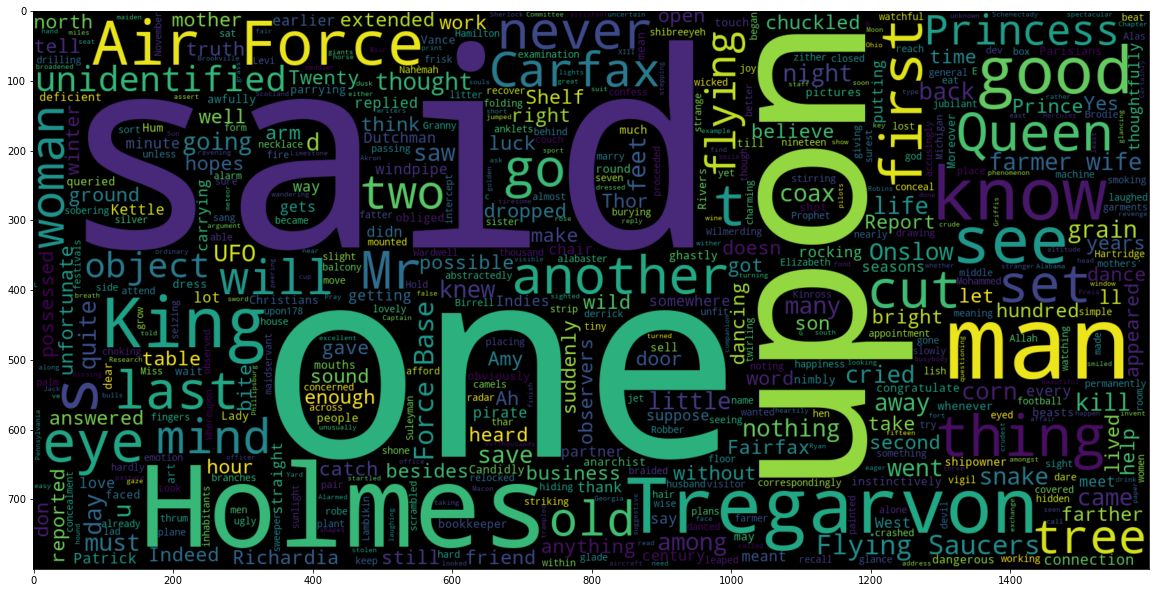

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(ebooks_df[ebooks_df.Sentiment == 'pos'].Summary))
plt.imshow(wc , interpolation = 'bilinear')

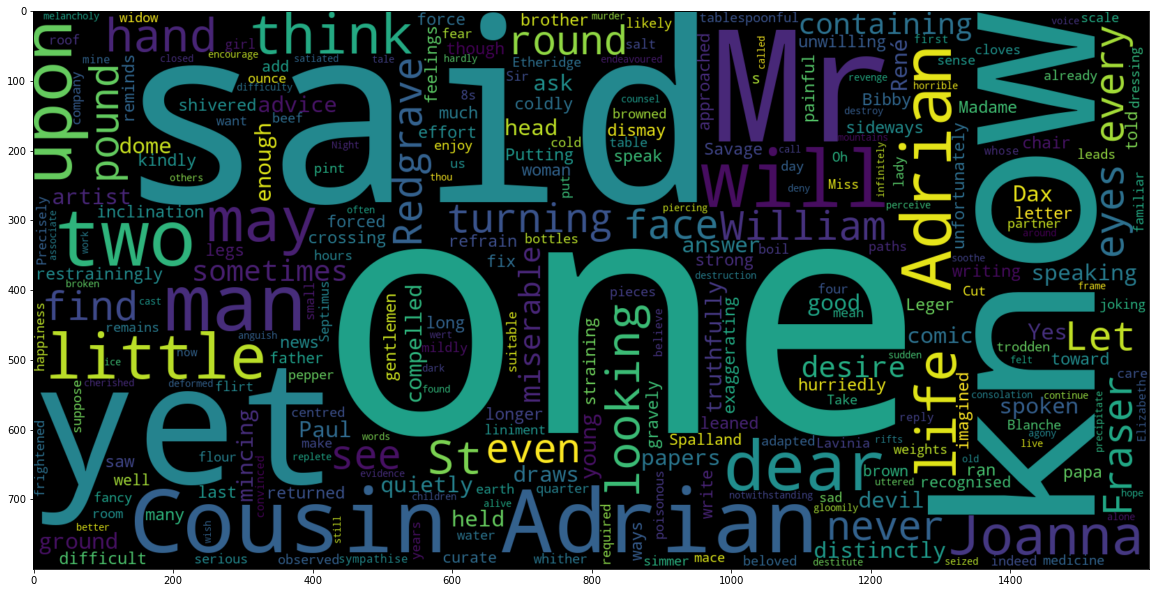

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(ebooks_df[ebooks_df.Sentiment == 'neg'].Summary))
plt.imshow(wc , interpolation = 'bilinear')

In [28]:
df = pd.DataFrame()

In [29]:
df['Sentiment']=ebooks_df['Sentiment']
df['Text']= ebooks_df['Summary']

In [30]:
df

,Sentiment,Text
0,pos,"Shelf. Twenty-two’s getting on.”“Ah,” said Ons..."
1,pos,Tregarvon is still in the mind to sell?” queri...
2,pos,"The sunlight shone upon her braided hair, upon..."
3,pos,beat snake; Snake won't bite Queen; Queen won'...
4,neg,"""""Since you are good enough to ask my advice, ..."
5,pos,Flying Saucers and the U. S. Air Force. The Re...
6,neg,"As I did so, two gentlemen approached, and my ..."
7,pos,"""I have seen many giants, in my time,"" thought..."
8,pos,"“You’ve heard about me, Mr. Holmes,” she cried..."
9,neg,"“I fear, my beloved girl,” I said, “little hap..."


In [31]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [33]:
def preprocess2(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
      if token not in stop_words:
        if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
    return " ".join(tokens)

In [34]:
df.Text = df.Text.apply(lambda x: preprocess2(x))

In [35]:
df

,Sentiment,Text
0,pos,shelf twenty two getting ah said onslow set ro...
1,pos,tregarvon still mind sell queried round faced ...
2,pos,sunlight shone upon braided hair upon slight r...
3,pos,beat snake snake bite queen queen coax king ki...
4,neg,since good enough ask advice dear cousin adria...
5,pos,flying saucers u air force report unidentified...
6,neg,two gentlemen approached feelings dismay may i...
7,pos,seen many giants time thought hercules never o...
8,pos,heard mr holmes cried else could know never mi...
9,neg,fear beloved girl said little happiness remain...


In [36]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 8
Test Data size 2


In [39]:
df

,Sentiment,Text
0,pos,shelf twenty two getting ah said onslow set ro...
1,pos,tregarvon still mind sell queried round faced ...
2,pos,sunlight shone upon braided hair upon slight r...
3,pos,beat snake snake bite queen queen coax king ki...
4,neg,since good enough ask advice dear cousin adria...
5,pos,flying saucers u air force report unidentified...
6,neg,two gentlemen approached feelings dismay may i...
7,pos,seen many giants time thought hercules never o...
8,pos,heard mr holmes cried else could know never mi...
9,neg,fear beloved girl said little happiness remain...


In [40]:
train_data

,Sentiment,Text
0,pos,shelf twenty two getting ah said onslow set ro...
2,pos,sunlight shone upon braided hair upon slight r...
1,pos,tregarvon still mind sell queried round faced ...
9,neg,fear beloved girl said little happiness remain...
7,pos,seen many giants time thought hercules never o...
3,pos,beat snake snake bite queen queen coax king ki...
6,neg,two gentlemen approached feelings dismay may i...
4,neg,since good enough ask advice dear cousin adria...


In [41]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 663


In [42]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8, 30)
Testing X Shape: (2, 30)


In [43]:
labels = train_data.Sentiment.unique().tolist()

In [44]:
encoder = LabelEncoder()
encoder.fit(train_data.Sentiment.to_list())

y_train = encoder.transform(train_data.Sentiment.to_list())
y_test = encoder.transform(test_data.Sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (8, 1)
y_test shape: (2, 1)


In [45]:
GLOVE_EMB = '/Users/apple/Downloads/glove/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [46]:
import numpy as np

In [47]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [48]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [49]:
import tensorflow as tf

In [50]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [51]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [52]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [54]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [55]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.6845 - accuracy: 0.6250 - val_loss: 0.5991 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 58ms/step - loss: 0.6517 - accuracy: 0.6250 - val_loss: 0.5065 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 0.6181 - accuracy: 0.6250 - val_loss: 0.4196 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 53ms/step - loss: 0.5568 - accuracy: 0.6250 - val_loss: 0.3349 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 0.5340 - accuracy: 0.6250 - val_loss: 0.2684 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 64ms/step - loss: 0.4791 - accuracy: 0.6250 - val_loss: 0.2140 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 58ms/step - loss: 0.4197 - accuracy: 0.6250 - val_loss: 0.1736 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=============

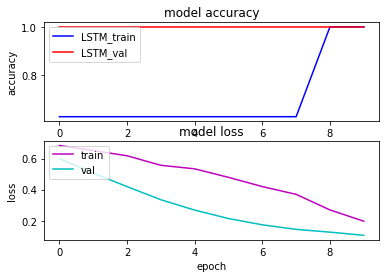

In [56]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [57]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 0s 361ms/step


In [58]:
y_pred_1d

['Positive', 'Positive']

In [59]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

<ipython-input-59-1c9448c746a5>:11: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


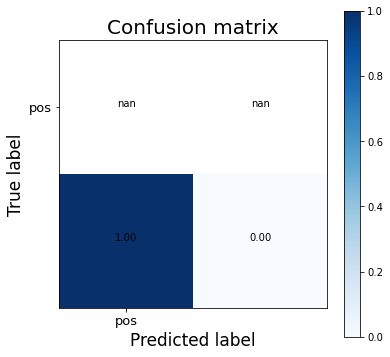

In [60]:
cnf_matrix = confusion_matrix(test_data.Sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.Sentiment.unique(), title="Confusion matrix")
plt.show()
